In [1]:
# Necessary import evil
%matplotlib inline
from physt import histogram, binning
import numpy as np
import matplotlib.pyplot as plt

## Creating a histogram

In [2]:
# Basic dataset
heights = [160, 155, 156, 198, 177, 168, 191, 183, 184, 179, 178, 172, 173, 175,
           172, 177, 176, 175, 174, 173, 174, 175, 177, 169, 168, 164, 175, 188,
           178, 174, 173, 181, 185, 166, 162, 163, 171, 165, 180, 189, 166, 163,
           172, 173, 174, 183, 184, 161, 162, 168, 169, 174, 176, 170, 169, 165]

hist = histogram(heights)     # Automatically select all settings
hist

Histogram1D(bins=7, total=56.0)

In [3]:
# Limit bins
hist2 = histogram(heights, bins=10, range=(170, 190))
hist2

Histogram1D(bins=10, total=56.0, underflow=19, overflow=2)

*total* == *underflow* + *overflow* + *sum(frequencies)*

## Data representation

In [4]:
hist2.bins              # Numpy array with left and right edges

array([[ 170.,  172.],
       [ 172.,  174.],
       [ 174.,  176.],
       [ 176.,  178.],
       [ 178.,  180.],
       [ 180.,  182.],
       [ 182.,  184.],
       [ 184.,  186.],
       [ 186.,  188.],
       [ 188.,  190.]])

In [5]:
hist2.frequencies       # Numpy array with frequencies

array([ 2.,  7.,  9.,  5.,  3.,  2.,  2.,  3.,  0.,  2.])

## Indexing

Supported indexing is more or less compatible with numpy arrays.

In [6]:
hist2.find_bin(173)           # Find a proper bin for some value (0 - based indices)

1

In [7]:
hist2[5]                      # Return the bin (with frequency)

(array([ 180.,  182.]), 2.0)

In [8]:
hist2[-3:]                    # Sub-histogram (as slice)

Histogram1D(bins=3, total=56.0, underflow=49.0, overflow=2)

In [9]:
hist2[hist2.frequencies > 5]  # Masked array (destroys underflow & overflow information)

Histogram1D(bins=2, total=16.0, underflow=nan, overflow=nan)

In [10]:
hist2[[1, 3, 5]]              # Select some of the bins

Histogram1D(bins=3, total=14.0, underflow=nan, overflow=nan)

## Plotting

This is currently based on matplotlib, but other tools might come later (d3.js, bokeh?)

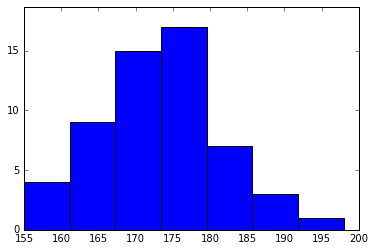

In [11]:
hist.plot();     # Basic plot

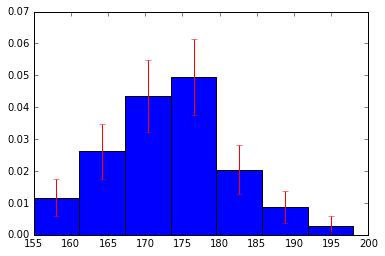

In [12]:
hist.plot(density=True, errors=True, ecolor="red");   # Include errors

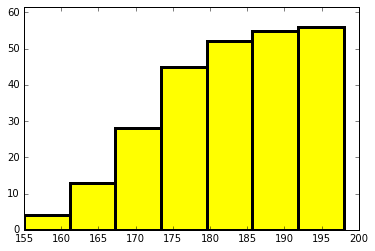

In [13]:
hist.plot(cumulative=True, color="yellow", lw=3);           # Use matplotlib parameters

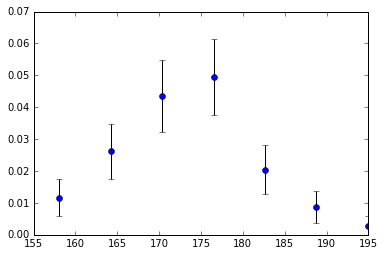

In [14]:
hist.plot(histtype="scatter", s=hist.frequencies, density=True, errors=True);    # Another plot type

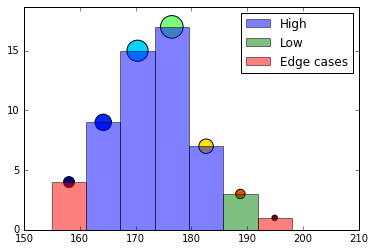

In [15]:
# Plot different bins using different styles
axis = hist[hist.frequencies > 5].plot(label="High", alpha=0.5)
hist[1:-1][hist[1:-1].frequencies <= 5].plot(ax=axis, color="green", label="Low", alpha=0.5)
hist[[0, -1]].plot(ax=axis, color="red", label="Edge cases", alpha=0.5)
hist.plot(histtype="scatter", ax=axis, c=range(hist.bin_count), s=hist.frequencies * 30)
axis.legend();

## Irregular binning and densities

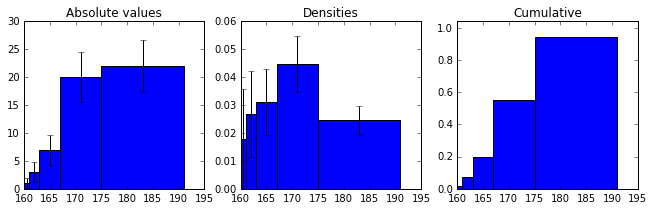

In [16]:
figure, axes = plt.subplots(1, 3, figsize=(11, 3))

hist_irregular = histogram(heights, [160, 161, 163, 167, 175, 191])
hist_irregular.plot(ax=axes[0], errors=True);
hist_irregular.plot(ax=axes[1], density=True, errors=True);
hist_irregular.plot(ax=axes[2], density=True, cumulative=True);

axes[0].set_title("Absolute values")
axes[1].set_title("Densities")
axes[2].set_title("Cumulative");

In [17]:
# histogram(heights, "exponential").plot()

## Adding new values

### Add single values

After 0 batches: Histogram1D(bins=80, total=10000.0, underflow=349)
After 1 batches: Histogram1D(bins=80, total=20000.0, underflow=349)
After 2 batches: Histogram1D(bins=80, total=30000.0, underflow=349)
After 3 batches: Histogram1D(bins=80, total=40000.0, underflow=349, overflow=366)


Histogram1D(bins=80, total=40000.0, underflow=349, overflow=366)

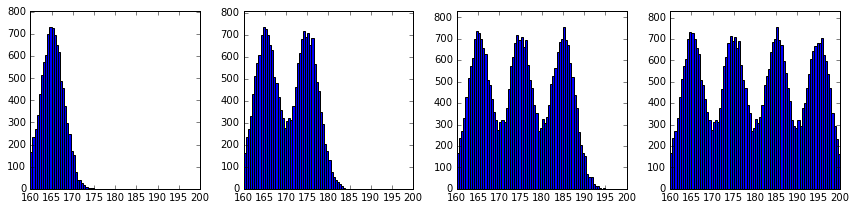

In [18]:
figure, axes = plt.subplots(1, 4, figsize=(12, 3))

hist3 = histogram([], bins=80, range=(160, 200))

for i, ax in enumerate(axes):
    for height in np.random.normal(165 + 10 * i, 2.8, 10000):
        hist3.fill(height)
    hist3.plot(ax=ax);
    print("After {0} batches: {1}".format(i, hist3))
figure.tight_layout()
hist3

### Add histograms with same binning

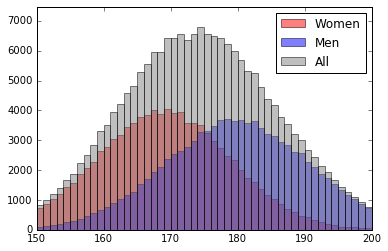

In [19]:
heights1 = histogram(np.random.normal(169, 10, 100000), bins=50, range=(150, 200))
heights2 = histogram(np.random.normal(180, 11, 100000), bins=50, range=(150, 200))


total = heights1 + heights2

axis = heights1.plot(label="Women", color="red", alpha=0.5)
heights2.plot(label="Men", color="blue", alpha=0.5, ax=axis)
total.plot(label="All", color="gray", alpha=0.5, ax=axis)
axis.legend();

## Compatibility

Note: Mostly, the compatibility is a trivial consequence of the object being convertible to numpy array

In [20]:
# Convert to pandas dataframe
hist.to_dataframe()

,left,right,frequency,error
0,155.000000,161.142857,4,2.000000
1,161.142857,167.285714,9,3.000000
2,167.285714,173.428571,15,3.872983
3,173.428571,179.571429,17,4.123106
4,179.571429,185.714286,7,2.645751
5,185.714286,191.857143,3,1.732051
6,191.857143,198.000000,1,1.000000


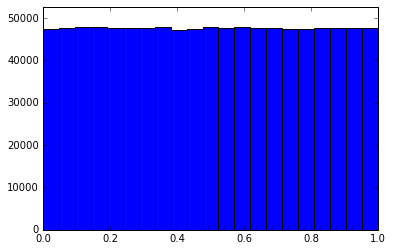

In [21]:
# Works on xarray
import xarray as xr
arr = xr.DataArray(np.random.rand(100, 100, 100))
histogram(arr).plot();

In [22]:
# Works on pandas dataseries
import pandas as pd
series = pd.Series(heights)
histogram(series)

Histogram1D(bins=7, total=56.0)

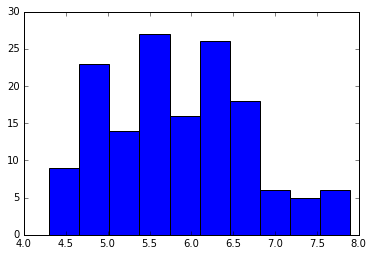

In [23]:
# Works on blaze data fields
from blaze import Data
from blaze.utils import example
iris = Data(example('iris.csv'))
histogram(iris.sepal_length, bins=10).plot();

## Export & import

In [24]:
json = hist.to_json()     # add path argument to write it to file
json

'{"bins": [[155.0, 161.14285714285714], [161.14285714285714, 167.28571428571428], [167.28571428571428, 173.42857142857144], [173.42857142857144, 179.57142857142858], [179.57142857142858, 185.71428571428572], [185.71428571428572, 191.85714285714286], [191.85714285714286, 198.0]], "frequencies": [4.0, 9.0, 15.0, 17.0, 7.0, 3.0, 1.0], "errors2": [4.0, 9.0, 15.0, 17.0, 7.0, 3.0, 1.0], "keep_missed": true, "underflow": 0.0, "overflow": 0.0}'

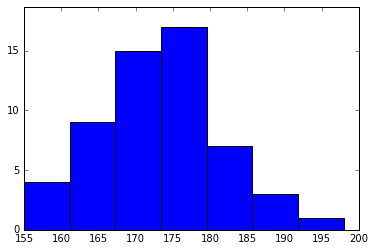

In [25]:
from physt.histogram1d import Histogram1D
Histogram1D.from_json(path="x.json").plot();